<H1>Stratégie Envelope Multicoin</H1>
Indicateurs: Envelope + SMA<br>
SEG

In [1]:
# Modules standards
import sys
sys.path.append('../..')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import nest_asyncio
nest_asyncio.apply()

# ========== CHOIX DE LA VERSION DU MOTEUR ==========
# v1 = ancien système (BUG avec leverage - à garder pour comparaison legacy)
# v2 = nouveau système avec marge et liquidation correctes
ENGINE_VERSION = "v2"  # "v1" ou "v2"
# ===================================================

# Modules perso - Import conditionnel selon la version
if ENGINE_VERSION == "v2":
    from utilities.strategies.envelopeMulti_v2 import EnvelopeMulti_v2 as EnvelopeMulti
    print("ENGINE V2 - Systeme de marge et liquidation corriges")
else:
    from utilities.strategies.envelopeMulti import EnvelopeMulti
    print("ENGINE V1 (LEGACY) - Ancien systeme avec bug leverage")

from utilities.data_manager import ExchangeDataManager
from utilities.bt_analysis import multi_backtest_analysis
from utilities.plot_analysis import plot_equity_vs_asset, plot_bar_by_month

ENGINE V2 - Systeme de marge et liquidation corriges


c:\Users\jacks\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ============================================================================
# CONFIGURATION OPTIMISÉE FINALE (Validée 2025-10-05)
# ============================================================================
# MA = 5 (global)
# Size = 0.12 (uniforme - meilleure performance que size variable)
# Envelopes = 3 ou 4 selon volatilité (data-driven mapping)
# Adaptive = False (toujours moins performant)
# ============================================================================
# 📊 RÉSULTATS VALIDÉS:
#   - Performance 2020-2025: +61,310%
#   - Sharpe ratio global: 4.82
#   - Max DD: -17.92% (maîtrisé)
#   - Win rate: 70.06%
#   - 9,552 trades sur 5 ans
# ============================================================================

BACKTEST_LEVERAGE = 10  # Leverage utilisé (doit correspondre au live)

# Config globale optimisée
MA_OPTIMALE = 5
SIZE_UNIFORME = 0.12  # Validé: +11.96% perf vs size variable

# Envelopes par nb de niveaux
envelopes_3 = [0.07, 0.10, 0.15]
envelopes_4 = [0.07, 0.10, 0.12, 0.15]  # Pour haute volatilité

# Mapping 3/4 envelopes basé sur volatilité (envelope_count_mapping.csv)
# Seuil: 1.21% volatilité quotidienne (75e percentile)
params_live = {
    # === MAJOR (3 envelopes) ===
    "BTC/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "ETH/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    
    # === MID-CAP (mix 3/4 selon volatilité) ===
    "BNB/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME},  # ✓ 4 env (vol 1.48%)
    "SOL/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},  # 3 env (vol 1.12%)
    "ADA/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},  # 3 env (vol 1.06%)
    "AR/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME},   # ✓ 4 env (vol 1.26%)
    "AVAX/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME}, # 3 env (vol 1.07%)
    "EGLD/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "KSM/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "ACH/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "APE/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "CRV/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "IMX/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "LDO/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "NEAR/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "SAND/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "THETA/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "UNI/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "XTZ/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    "ICP/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    
    # === VOLATILE (4 envelopes selon mapping) ===
    "DOGE/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},  # 3 env (vol 1.05%)
    "SUSHI/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME}, # ✓ 4 env (vol 1.36%)
    "GALA/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME},  # ✓ 4 env (vol 1.25%)
    "FET/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME},   # ✓ 4 env (vol 1.26%)
    "MAGIC/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME}, # ✓ 4 env (vol 1.26%)
    "DYDX/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_4, "size": SIZE_UNIFORME},  # ✓ 4 env (vol 1.23%)
    "ENJ/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},
    
    # === LOW (3 envelopes) ===
    "TRX/USDT:USDT": {"src": "close", "ma_base_window": MA_OPTIMALE, "envelopes": envelopes_3, "size": SIZE_UNIFORME},   # 3 env (vol 0.74%)
}

# Ajustement automatique des size pour le backtest (division par leverage)
# Pourquoi ? Le moteur V2 en mode "scaling" calcule: notional = equity * size * leverage
# Pour coller au live qui fait: notional = balance * size * leverage
# On doit diviser size par leverage: notional = equity * (size/leverage) * leverage = equity * size
params = {}
for pair, p in params_live.items():
    params[pair] = p.copy()
    params[pair]["size"] = p["size"] / BACKTEST_LEVERAGE

print(f"⚙️  CONFIGURATION OPTIMISÉE FINALE:")
print(f"   MA globale: {MA_OPTIMALE}")
print(f"   Size uniforme: {SIZE_UNIFORME}")
print(f"   Leverage: {BACKTEST_LEVERAGE}x")
print(f"   Reinvest: OUI (recalcul sizing à chaque trade)")
print(f"   3 envelopes: {len([p for p in params_live.values() if len(p['envelopes']) == 3])} pairs")
print(f"   4 envelopes: {len([p for p in params_live.values() if len(p['envelopes']) == 4])} pairs")
print(f"   Size ajusté backtest: {params['BTC/USDT:USDT']['size']:.4f} (= {SIZE_UNIFORME}/{BACKTEST_LEVERAGE})")

pair_list = list(params.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT:USDT"

exchange = ExchangeDataManager(exchange_name=exchange_name, path_download="../database/exchanges")

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc["2020-04-01": ]

print(f"✅ Data chargée: {len(pair_list)} paires depuis 2020-04-01")

<H2>Backtest</H2>

In [40]:
# ============================================================
# PARAMETRES BACKTEST (synchronisés avec cellule 2 ET live)
# ============================================================
initial_wallet = 1000
leverage = BACKTEST_LEVERAGE  # Synchronisé avec cellule 2
reinvest = True               # TOUJOURS True pour reproduire le live
stop_loss = 0.25              # 25% (aligné avec live: sl = 0.25)
liquidation = True            # Liquidation activée
type = ["long", ""]           # Long uniquement (pas de short)
maker_fee, taker_fee = 0.0002, 0.0006  # Bitget

# === PARAMETRES V2 (DÉSACTIVÉS pour reproduire le live) ===
# Le live n'a PAS de caps - il laisse l'exchange gérer la marge.
# Pour reproduire exactement le comportement live, on met des valeurs très hautes.
# gross_cap = 999        # Désactivé (le live n'a pas cette limite)
# per_side_cap = 999     # Désactivé (le live n'a pas cette limite)
# per_pair_cap = 999     # Désactivé (le live n'a pas cette limite)
# margin_cap = 0.99      # Utilise 99% de l'equity (proche du comportement live)
# use_kill_switch = False

#=== ANCIENS PARAMETRES (mode conservateur) ===
#Décommenter pour backtest avec gestion de risque conservative
gross_cap = 5         # Cap exposition brute (5x equity)
per_side_cap = 4      # Cap par côté LONG/SHORT (4x equity)
per_pair_cap = 1.2    # Cap par paire (1.2x equity pour DCA)
margin_cap = 0.9      # Cap marge utilisée (0.9x equity)

# RISK MODE (V2 uniquement)
risk_mode = "scaling"  # TOUJOURS "scaling" pour coller au live
max_expo_cap = 2.5     # (HYBRID only)

# Autres paramètres V2
auto_adjust_size = False  # Déjà fait dans cellule 2
extreme_leverage_threshold = 50

# Slippage (optionnel)
entry_slippage_bps = 5   # 0.05%
exit_slippage_bps  = 5   # 0.05%
# ============================================================

print(f"Configuration Backtest:")
print(f"  Version moteur: {ENGINE_VERSION}")
print(f"  Wallet initial: {initial_wallet}$")
print(f"  Leverage: {leverage}x")
print(f"  Stop-loss: {stop_loss*100}%")
print(f"  Reinvest: ✅ OUI (comme live)")
print(f"  Type: {type}")

if ENGINE_VERSION == "v2":
    print(f"\nParametres V2 (mode LIVE - caps désactivés):")
    print(f"  Risk mode: {risk_mode.upper()}")
    print(f"  ✅ Size ajusté pour reinvest=True (divisé par {leverage})")
    print(f"  Gross cap: {gross_cap}x | Per-side: {per_side_cap}x | Per-pair: {per_pair_cap}x")
    print(f"  Margin cap: {margin_cap}x | Kill-switch: {'ON' if use_kill_switch else 'OFF'}")
    print(f"  ⚠️  CAPS DÉSACTIVÉS - Reproduit le comportement du robot live")

strat = EnvelopeMulti(df_list=df_list, oldest_pair=oldest_pair, type=type, params=params)

strat.populate_indicators()
strat.populate_buy_sell()

# # === DEBUG: Vérifier génération des signaux ===
# print("\n" + "="*60)
# print("DEBUG: ANALYSE DES SIGNAUX GENERES")
# print("="*60)
# for pair in list(params.keys())[:8]:  # 8 premières paires
#     df = strat.df_list[pair]
#     try:
#         signals_2020 = df.loc["2020"].get('open_long_1', pd.Series([False]*len(df.loc["2020"]))).sum()
#         signals_2021_plus = df.loc["2021":].get('open_long_1', pd.Series([False]*len(df.loc["2021":]))).sum()
#         total_signals = df.get('open_long_1', pd.Series([False]*len(df))).sum()
#         print(f"{pair:20s} | 2020: {signals_2020:4d} | 2021+: {signals_2021_plus:4d} | Total: {total_signals:4d}")
#     except Exception as e:
#         print(f"{pair:20s} | ERREUR: {e}")

# Appel du backtest
if ENGINE_VERSION == "v2":
    bt_result = strat.run_backtest(
        initial_wallet=initial_wallet, leverage=leverage, maker_fee=maker_fee,
        taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest, liquidation=liquidation,
        gross_cap=gross_cap, per_side_cap=per_side_cap, per_pair_cap=per_pair_cap, 
        margin_cap=margin_cap, use_kill_switch=use_kill_switch,
        auto_adjust_size=auto_adjust_size, extreme_leverage_threshold=extreme_leverage_threshold,
        risk_mode=risk_mode, max_expo_cap=max_expo_cap
    )
else:
    bt_result = strat.run_backtest(initial_wallet=initial_wallet, leverage=leverage, maker_fee=maker_fee,
        taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest, liquidation=liquidation
    )

print(f"\n{'='*60}")
print(f"RESULTATS BACKTEST ({ENGINE_VERSION.upper()})")
print(f"{'='*60}")

# === DEBUG: Afficher les event counters ===
if 'event_counters' in bt_result:
    print("\n" + "="*60)
    print("DEBUG: EVENT COUNTERS (rejections et statistiques)")
    print("="*60)
    for key, value in bt_result['event_counters'].items():
        if value > 0:  # Afficher seulement les non-nuls
            if isinstance(value, float):
                print(f"  {key:35s}: {value:12.2f}")
            else:
                print(f"  {key:35s}: {value:6d}")
    print("="*60 + "\n")

# Sections a afficher
df_trades, df_days = multi_backtest_analysis(
    trades=bt_result['trades'],
    days=bt_result['days'],
    leverage=leverage,
    general_info=True, trades_info=True, days_info=True, long_short_info=True,
    entry_exit_info=True, exposition_info=False, pair_info=True, indepedant_trade=True
)

Configuration Backtest:
  Version moteur: v2
  Wallet initial: 1000$
  Leverage: 10x
  Stop-loss: 25.0%
  Reinvest: ✅ OUI (comme live)
  Type: ['long', '']

Parametres V2 (mode LIVE - caps désactivés):
  Risk mode: SCALING
  ✅ Size ajusté pour reinvest=True (divisé par 10)
  Gross cap: 5x | Per-side: 4x | Per-pair: 1.2x
  Margin cap: 0.9x | Kill-switch: OFF
  ⚠️  CAPS DÉSACTIVÉS - Reproduit le comportement du robot live

RESULTATS BACKTEST (V2)

DEBUG: EVENT COUNTERS (rejections et statistiques)
  added_margin                       :    689854.29
  released_margin                    :    689854.29

╒═════════════════════════════════╤══════════════════════════╕
│ Informations générales          │                          │
╞═════════════════════════════════╪══════════════════════════╡
│ Période                         │ 12.04.2020 -> 03.10.2025 │
│ Portefeuille initial            │ 1,000.00 $  (levier x10) │
│                                 │                          │
│ Portefeuille f

## Comparaison V1 vs V2

**Differences cles** :
- **V1 (Legacy)** : Bug avec leverage - multiplie le PnL par leverage sans verifier la liquidation intra-bougie
- **V2 (Corrige)** : 
  - Systeme de marge correct (`init_margin = notional / leverage`)
  - Liquidation prix calcule et verifie intra-bougie (`low <= liq_price`)
  - Exposure caps pour limiter le risque
  - Kill-switch pour pause automatique apres drawdown

**Pour comparer** : Changez `ENGINE_VERSION` dans la premiere cellule et relancez le backtest.

In [23]:
# === Analyse specifique V2 : Liquidations ===
if ENGINE_VERSION == "v2" and len(df_trades) > 0:
    liquidation_trades = df_trades[df_trades['close_reason'] == 'Liquidation']
    
    if len(liquidation_trades) > 0:
        print(f"\nLIQUIDATIONS DETECTEES : {len(liquidation_trades)} trades liquides")
        print(f"{'='*80}")
        
        for idx, trade in liquidation_trades.iterrows():
            entry_price = trade['open_price']
            liq_price = trade['close_price']
            drop_pct = ((liq_price / entry_price) - 1) * 100
            
            print(f"\n{trade['pair']} - {trade['position']}")
            print(f"   Date: {trade['close_date']}")
            print(f"   Entry: {entry_price:,.2f}$")
            print(f"   Liquidation: {liq_price:,.2f}$")
            print(f"   Drop: {drop_pct:.2f}%")
            print(f"   Wallet apres: {trade['wallet']:.2f}$")
        
        print(f"\n{'='*80}\n")
    else:
        print("\nAucune liquidation detectee avec la configuration actuelle\n")
else:
    print(f"\nMode V1 : Pas d'analyse de liquidation intra-bougie\n")


LIQUIDATIONS DETECTEES : 600 trades liquides

THETA/USDT:USDT - LONG
   Date: 2020-05-27 15:00:00
   Entry: 0.41$
   Liquidation: 0.37$
   Drop: -9.00%
   Wallet apres: 1007.43$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 17:00:00
   Entry: 0.39$
   Liquidation: 0.36$
   Drop: -9.00%
   Wallet apres: 1003.90$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 20:00:00
   Entry: 0.37$
   Liquidation: 0.34$
   Drop: -9.00%
   Wallet apres: 1000.31$

THETA/USDT:USDT - LONG
   Date: 2020-05-27 22:00:00
   Entry: 0.33$
   Liquidation: 0.30$
   Drop: -9.00%
   Wallet apres: 996.73$

CRV/USDT:USDT - LONG
   Date: 2020-09-02 01:00:00
   Entry: 4.96$
   Liquidation: 4.51$
   Drop: -9.00%
   Wallet apres: 1172.34$

CRV/USDT:USDT - LONG
   Date: 2020-09-02 11:00:00
   Entry: 4.33$
   Liquidation: 3.94$
   Drop: -9.00%
   Wallet apres: 1169.51$

CRV/USDT:USDT - LONG
   Date: 2020-09-03 12:00:00
   Entry: 3.54$
   Liquidation: 3.22$
   Drop: -9.00%
   Wallet apres: 1185.36$

SUSHI/USDT:USDT - LONG
   Dat

In [ ]:
# Analyse détaillée pour debug
# df_trades = df_trades.sort_index()
# SL_trades = df_trades[df_trades["close_reason"] == "Stop Loss"]
# result_columns = ["pair", "open_date", "close_date", "open_reason", "close_reason", "wallet", "trade_result", "drawdown", "drawdown_pct"]
# SL_trades.loc[:]

# df_trades.tail(20)

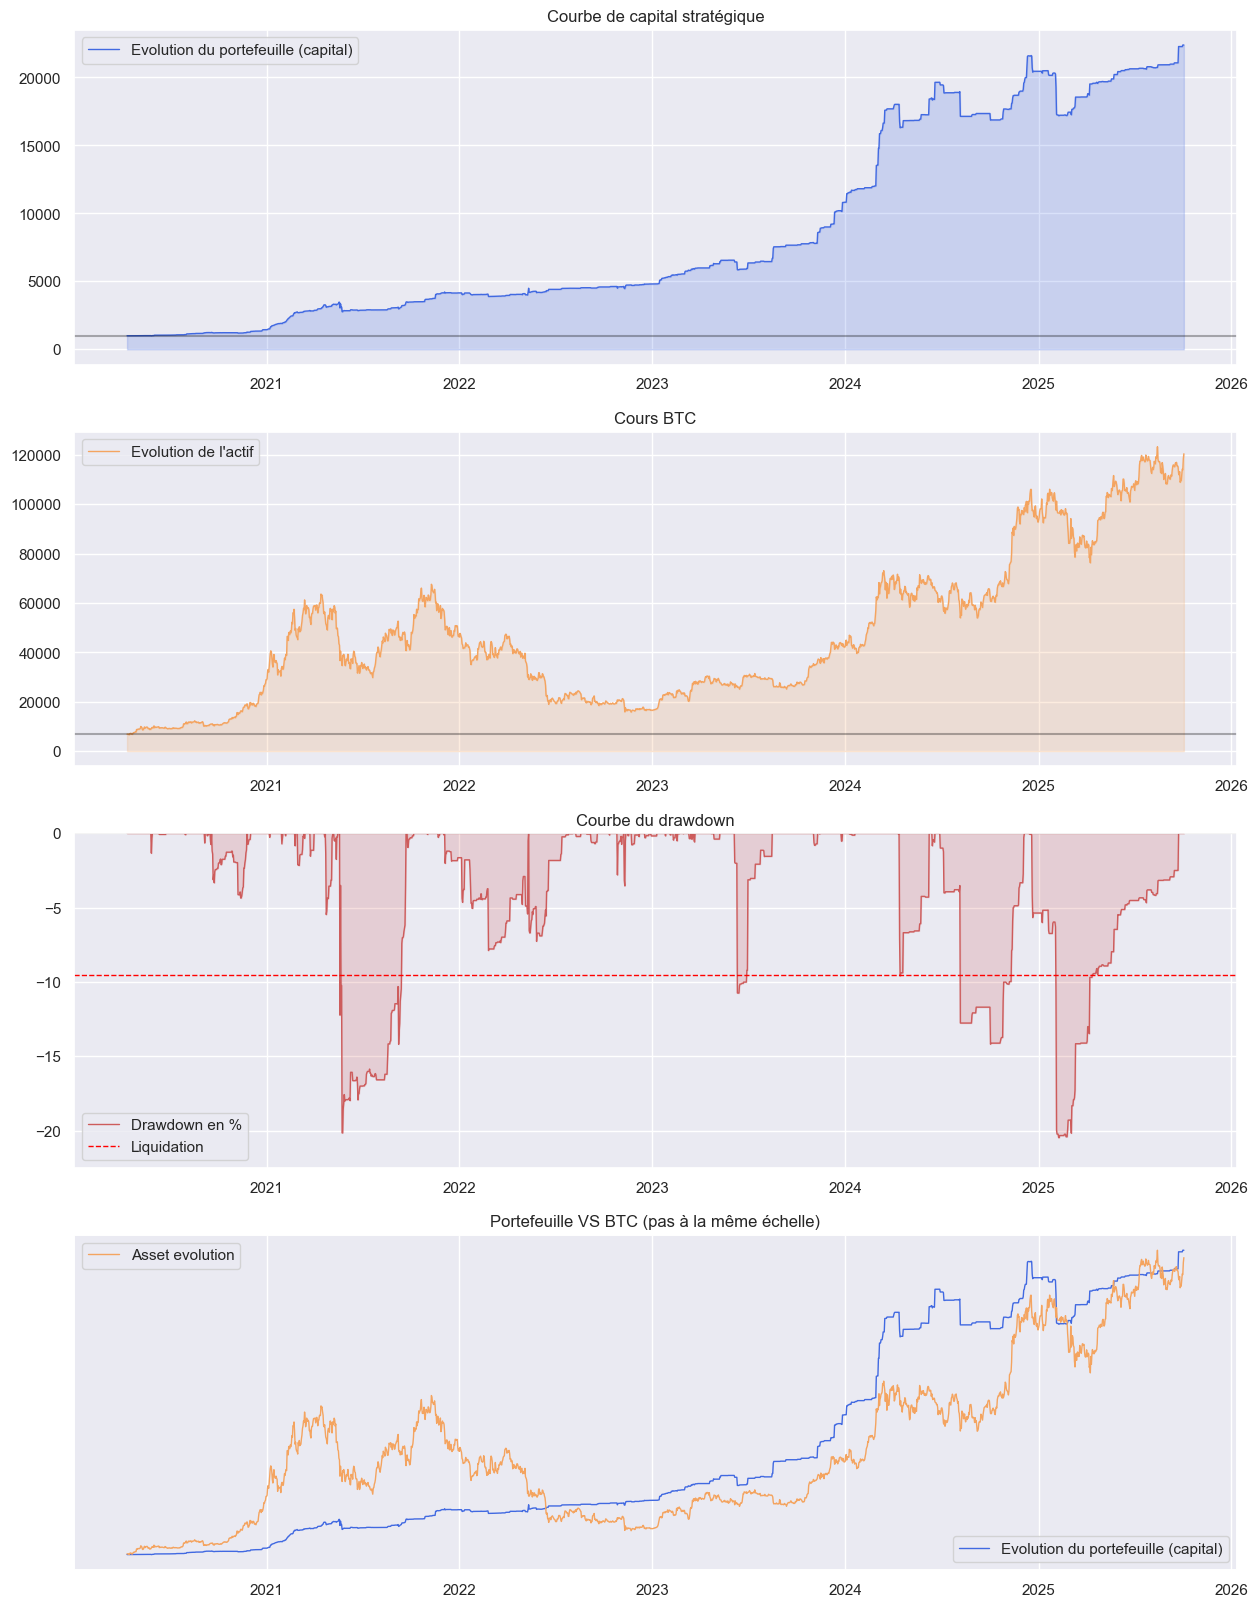

In [24]:
# plot_equity_vs_asset(df_days=df_days.loc["2020-03-11":"2020-03-20"], pair=oldest_pair)    # Pour analyse
plot_equity_vs_asset(df_days=df_days.loc[:], pair=oldest_pair, leverage=leverage, log=False) 

Trades dans le temps

In [25]:
# Trades au fil du temps
import plotly.graph_objects as go
import pandas as pd

df_trades['open_date'] = pd.to_datetime(df_trades['open_date'])
df_trades['close_date'] = pd.to_datetime(df_trades['close_date'])

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_trades['open_date'], y=df_trades['trade_result_pct']*100, mode='markers', marker=dict(color='green'), name='Open Trades'))
fig.add_trace(go.Scatter(x=df_trades['close_date'], y=df_trades['trade_result_pct']*100, mode='markers', marker=dict(color='red'), name='Close Trades'))

# Ajouter une deuxième échelle y pour la courbe du BTC
fig.add_trace(go.Scatter(x=df_days['day'], y=df_days['price'], mode='lines', line=dict(color='rgba(0, 0, 255, 0.2)'), name='Prix du Bitcoin', yaxis='y2'))

fig.update_layout(title='Résultats des trades au fil du temps', xaxis_title='Date', showlegend=True,
                  yaxis=dict(title='Résultat des Trades [%]'),
                  yaxis2=dict(title='Prix du Bitcoin', overlaying='y', side='right'))

fig.show()

<H3>Performance par mois et année</H3>

----- 2020 Cumulative Performances: 45.0% -----


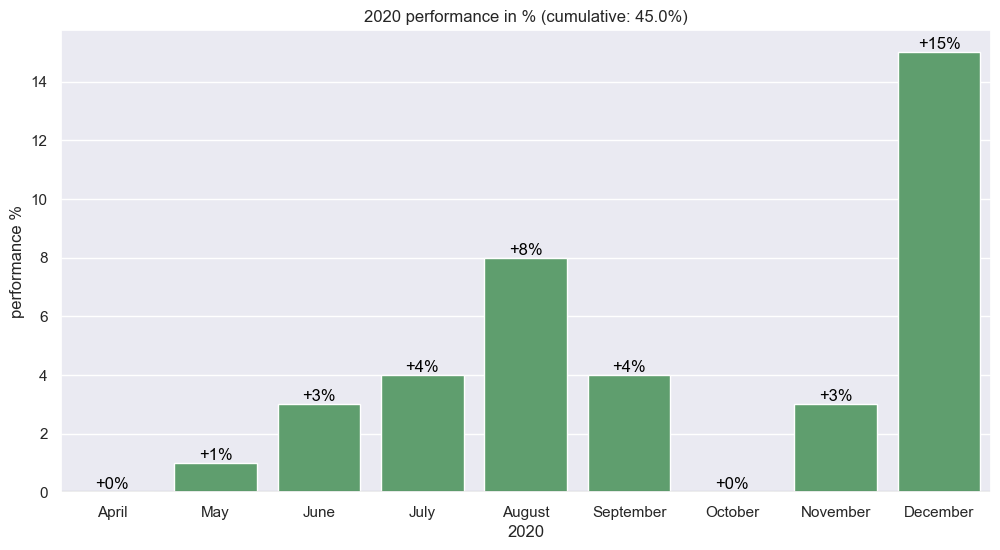

----- 2021 Cumulative Performances: 186.27% -----


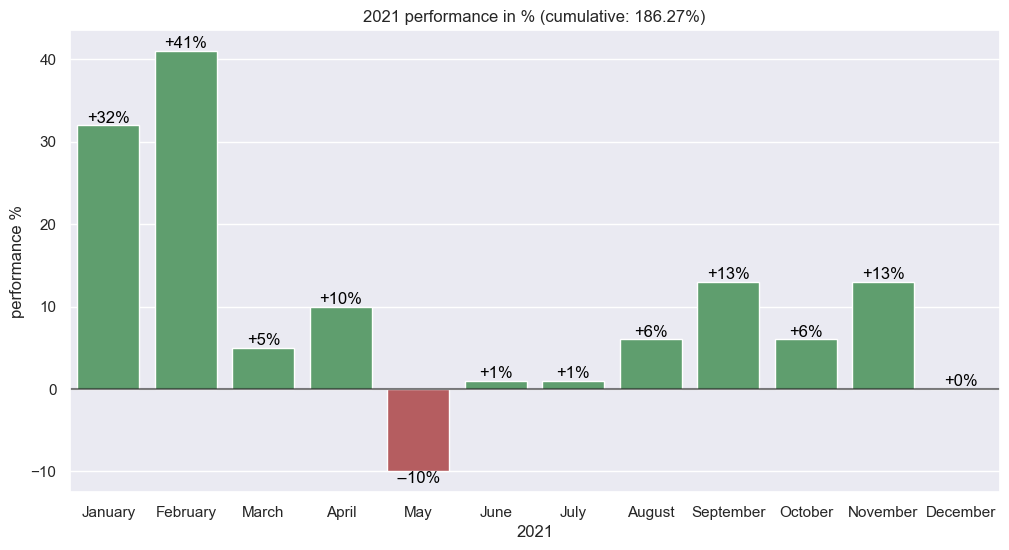

----- 2022 Cumulative Performances: 15.63% -----


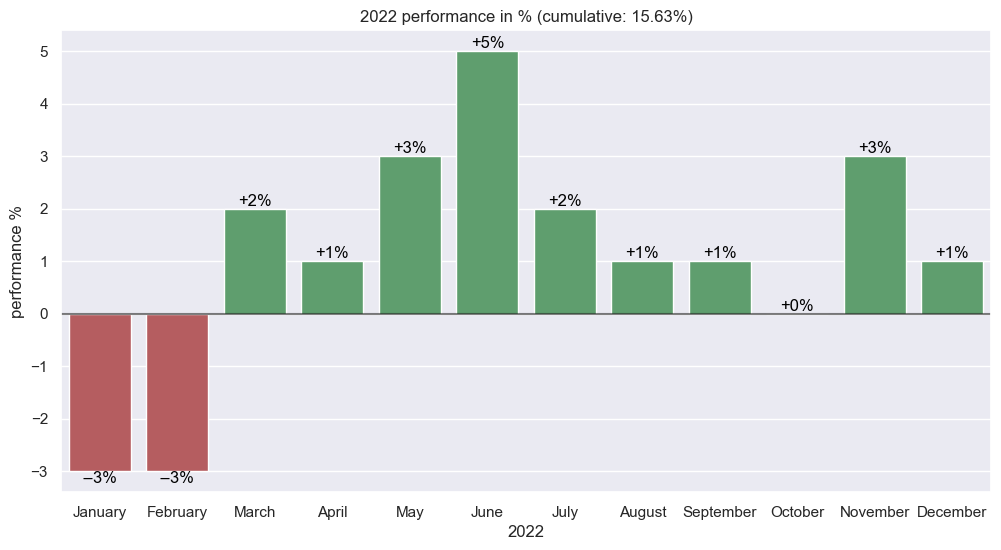

----- 2023 Cumulative Performances: 125.29% -----


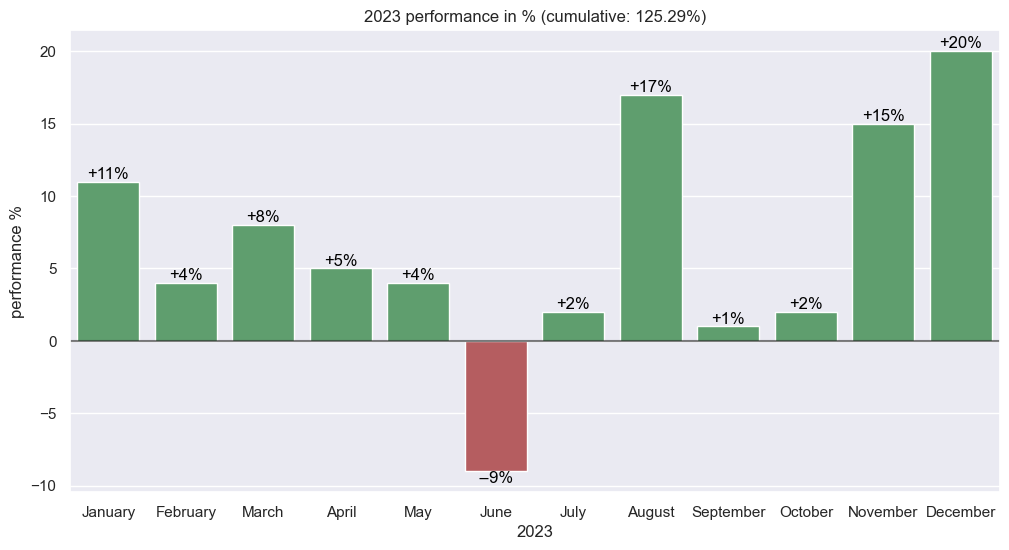

----- 2024 Cumulative Performances: 89.06% -----


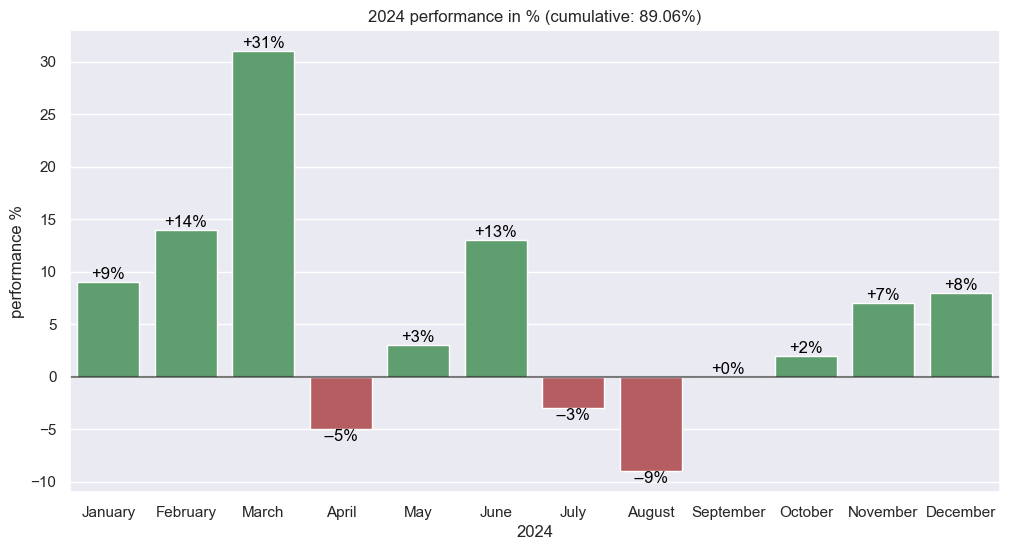

----- 2025 Cumulative Performances: 9.44% -----


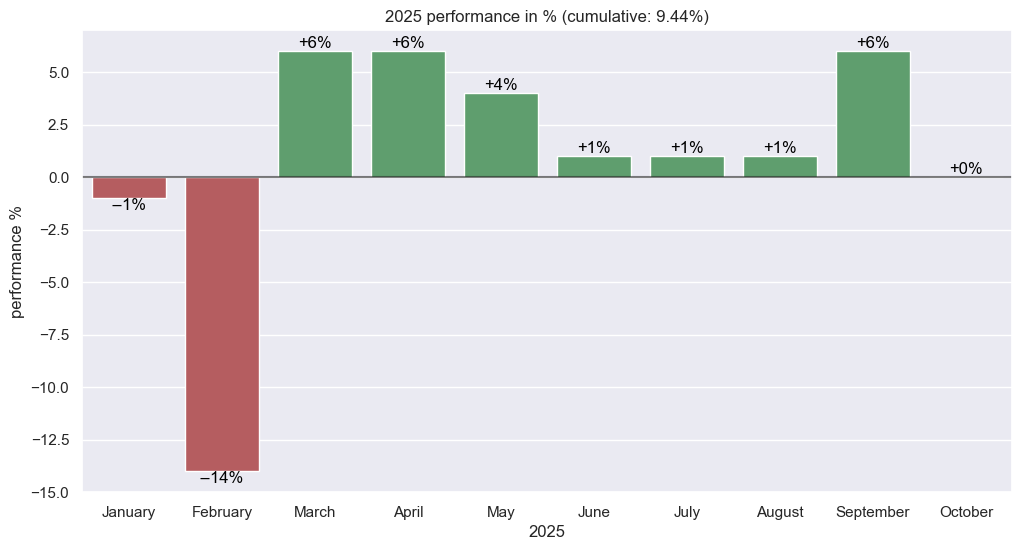

In [26]:
plot_bar_by_month(df_days=df_days)

<H2>Courbe de surapprentissage</H2>

In [38]:
# Comparer volatilité train vs test
train_data = df_list["BTC/USDT:USDT"].loc["2020-04-01":"2024-08-28"]
test_data = df_list["BTC/USDT:USDT"].loc["2024-08-28":]

print("VOLATILITÉ HORAIRE:")
print(f"  Train: {train_data['close'].pct_change().std()*100:.2f}%")
print(f"  Test:  {test_data['close'].pct_change().std()*100:.2f}%")

print("\nVOLATILITÉ QUOTIDIENNE:")
train_daily = train_data['close'].resample('D').last().pct_change()
test_daily = test_data['close'].resample('D').last().pct_change()
print(f"  Train: {train_daily.std()*100:.2f}%")
print(f"  Test:  {test_daily.std()*100:.2f}%")

# Analyser les opportunités d'entrée
print("\nOPPORTUNITÉS ENVELOPES (BTC):")
btc_train = df_list["BTC/USDT:USDT"].loc["2020-04-01":"2024-08-28"]
btc_test = df_list["BTC/USDT:USDT"].loc["2024-08-28":]

# Compter les signaux générés
signals_train = btc_train.get('open_long_1', pd.Series([False]*len(btc_train))).sum()
signals_test = btc_test.get('open_long_1', pd.Series([False]*len(btc_test))).sum()

print(f"  Train: {signals_train} signaux en {len(btc_train)} bougies")
print(f"  Test: {signals_test} signaux en {len(btc_test)} bougies")

VOLATILITÉ HORAIRE:
  Train: 0.68%
  Test:  0.49%

VOLATILITÉ QUOTIDIENNE:
  Train: 3.28%
  Test:  2.28%

OPPORTUNITÉS ENVELOPES (BTC):
  Train: 72 signaux en 38664 bougies
  Test: 1 signaux en 9634 bougies


In [30]:
# Test de corrélation sérielle des trades
from statsmodels.stats.diagnostic import acorr_ljungbox  # ← Sans underscore!

# Tester si trade N+1 dépend de trade N
trade_results = df_trades["trade_result_pct_wallet"].values
lb_test = acorr_ljungbox(trade_results, lags=[1, 5, 10], return_df=True)

print("Ljung-Box Test (autocorrélation des trades):")
print(lb_test)
print("\nInterprétation:")
for lag, pval in zip(lb_test.index, lb_test['lb_pvalue']):
    if pval < 0.05:
        print(f"  Lag {lag}: p={pval:.4f} → ⚠️  CORRÉLATION détectée (trades NON indépendants)")
    else:
        print(f"  Lag {lag}: p={pval:.4f} → ✅ Pas de corrélation")

Ljung-Box Test (autocorrélation des trades):
        lb_stat  lb_pvalue
1   1787.918935        0.0
5   4700.510159        0.0
10  5561.221217        0.0

Interprétation:
  Lag 1: p=0.0000 → ⚠️  CORRÉLATION détectée (trades NON indépendants)
  Lag 5: p=0.0000 → ⚠️  CORRÉLATION détectée (trades NON indépendants)
  Lag 10: p=0.0000 → ⚠️  CORRÉLATION détectée (trades NON indépendants)


Jarque-Bera Test:
  Statistic: 679.25
  P-value: 0.0000
⚠️  Distribution NON NORMALE → Monte Carlo sous-estime le risque!


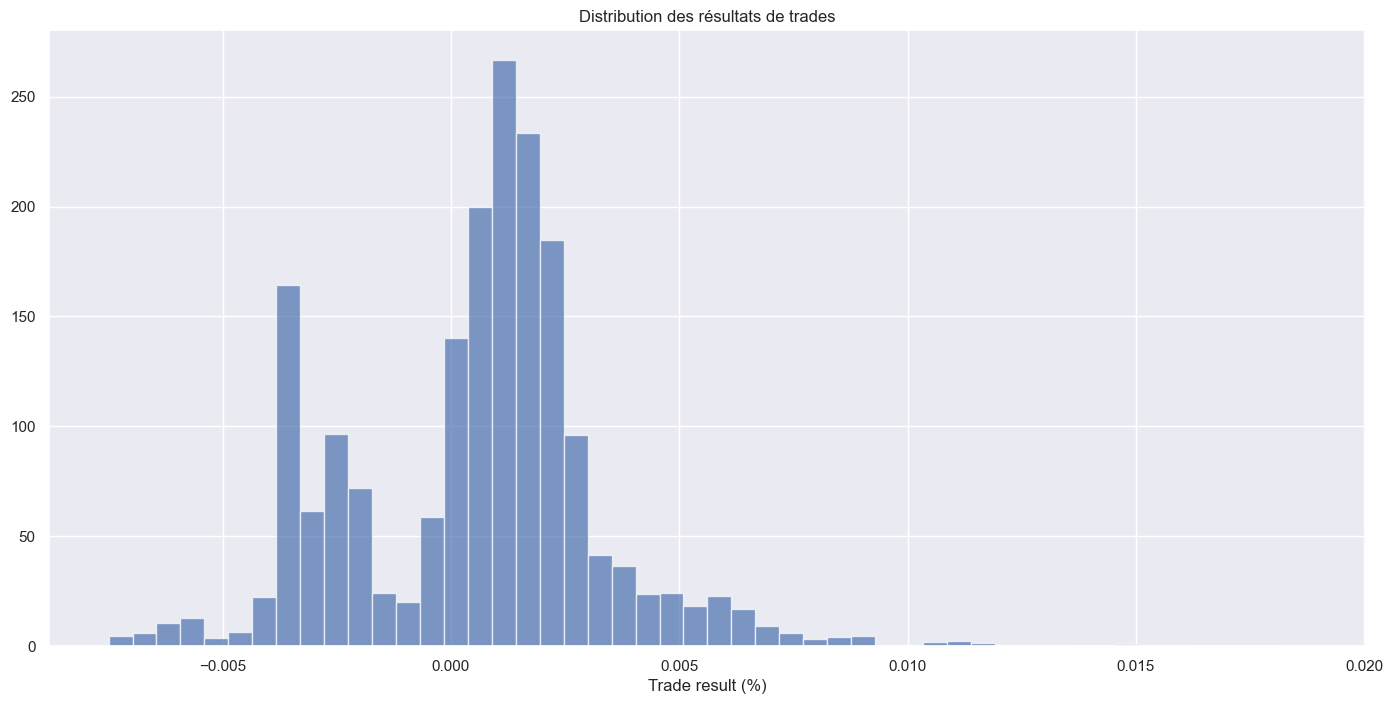

In [31]:
from scipy.stats import jarque_bera

# Test de normalité
trade_results = df_trades["trade_result_pct_wallet"].values
jb_stat, p_value = jarque_bera(trade_results)

print(f"Jarque-Bera Test:")
print(f"  Statistic: {jb_stat:.2f}")
print(f"  P-value: {p_value:.4f}")

if p_value < 0.05:
    print("⚠️  Distribution NON NORMALE → Monte Carlo sous-estime le risque!")
else:
    print("✅ Distribution normale OK")

# Visualiser
import matplotlib.pyplot as plt
plt.hist(trade_results, bins=50, density=True, alpha=0.7)
plt.title("Distribution des résultats de trades")
plt.xlabel("Trade result (%)")
plt.show()

Train/Test Split:
  Train: 2020-04-01 → 2024-08-28 (1610 jours)
  Test:  2024-08-28 → 2025-10-05 (402 jours)

VALIDATION OVERFITTING
Wallet final réel (test): 22385.75
Percentile vs simulations: 0.0%
📉 Performance inférieure: < 25% des simulations



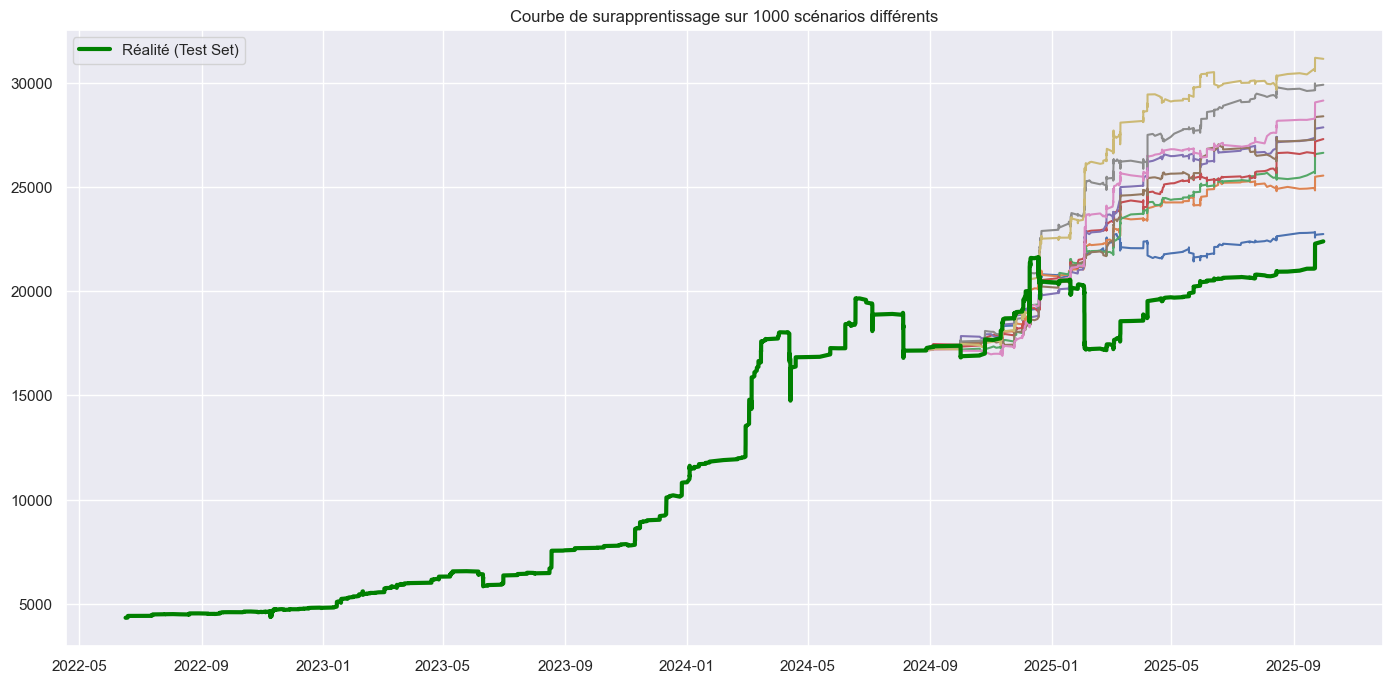

In [32]:
from importlib import reload
import utilities.plot_analysis
reload(utilities.plot_analysis)
from utilities.plot_analysis import plot_futur_simulations, plot_train_test_simulation, detect_date_train_test

# Test train/test
plot_train_test_simulation(
    df_trades=df_trades,
    train_test_date=detect_date_train_test("2020-04-01", 0.2),
    trades_multiplier=3,
    number_of_simulations=1000
)

In [33]:
# Vérifiez le comportement du BTC dans le test set
btc_test = df_list["BTC/USDT:USDT"].loc["2024-08-28":]
print(f"BTC Performance test:")
print(f"  Début: {btc_test['close'].iloc[0]:.0f}$")
print(f"  Fin: {btc_test['close'].iloc[-1]:.0f}$")
print(f"  Performance: {(btc_test['close'].iloc[-1]/btc_test['close'].iloc[0] - 1)*100:.2f}%")
print(f"  Volatilité: {btc_test['close'].pct_change().std()*100:.2f}%")

BTC Performance test:
  Début: 59050$
  Fin: 120258$
  Performance: 103.65%
  Volatilité: 0.49%


In [36]:
# Comparer train vs test
train_trades = df_trades[df_trades['close_date'] < "2024-08-28"]
test_trades = df_trades[df_trades['close_date'] >= "2024-08-28"]

print(f"TRAIN (2020-2024):")
print(f"  Trades: {len(train_trades)}")
print(f"  Win rate: {(train_trades['trade_result_pct'] > 0).mean()*100:.1f}%")
print(f"  Liquidations: {(train_trades['close_reason'] == 'Liquidation').sum()}")

print(f"\nTEST (2024-2025):")
print(f"  Trades: {len(test_trades)}")
print(f"  Win rate: {(test_trades['trade_result_pct'] > 0).mean()*100:.1f}%")
print(f"  Liquidations: {(test_trades['close_reason'] == 'Liquidation').sum()}")

TRAIN (2020-2024):
  Trades: 4655
  Win rate: 69.4%
  Liquidations: 544

TEST (2024-2025):
  Trades: 824
  Win rate: 66.0%
  Liquidations: 56


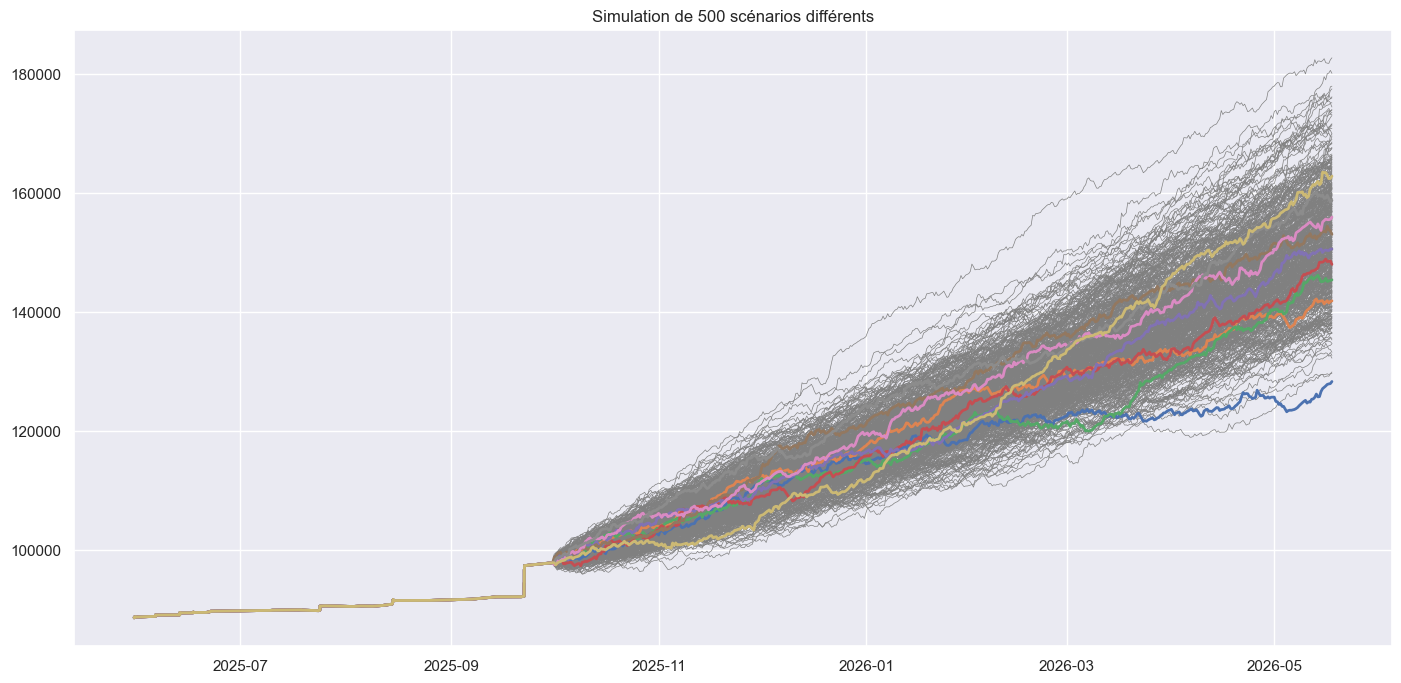

Train/Test Split:
  Train: 2020-04-01 → 2024-08-28 (1610 jours)
  Test:  2024-08-28 → 2025-10-05 (402 jours)

VALIDATION OVERFITTING
Wallet final réel (test): 97787.01
Percentile vs simulations: 0.0%
📉 Performance inférieure: < 25% des simulations



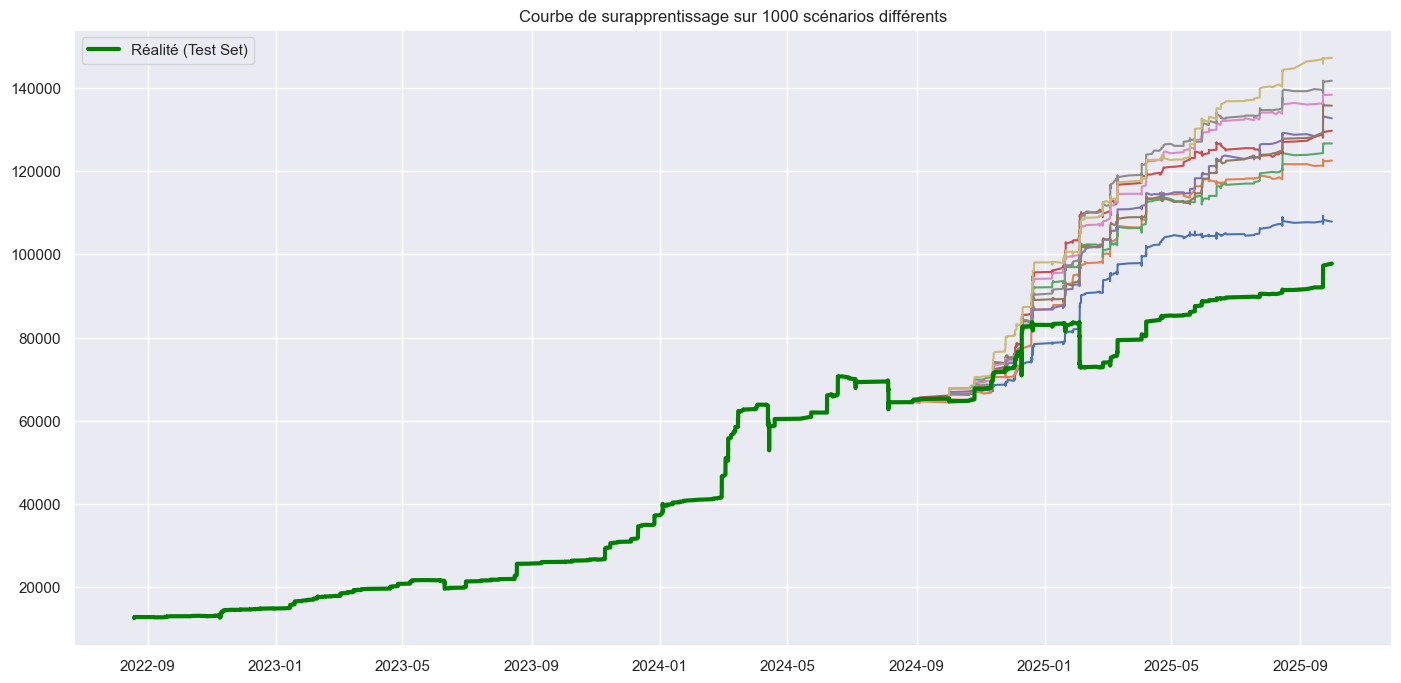


=== Test avec 15% de données test ===
Train/Test Split:
  Train: 2020-04-01 → 2024-12-07 (1711 jours)
  Test:  2024-12-07 → 2025-10-05 (301 jours)

VALIDATION OVERFITTING
Wallet final réel (test): 97787.01
Percentile vs simulations: 0.0%
📉 Performance inférieure: < 25% des simulations



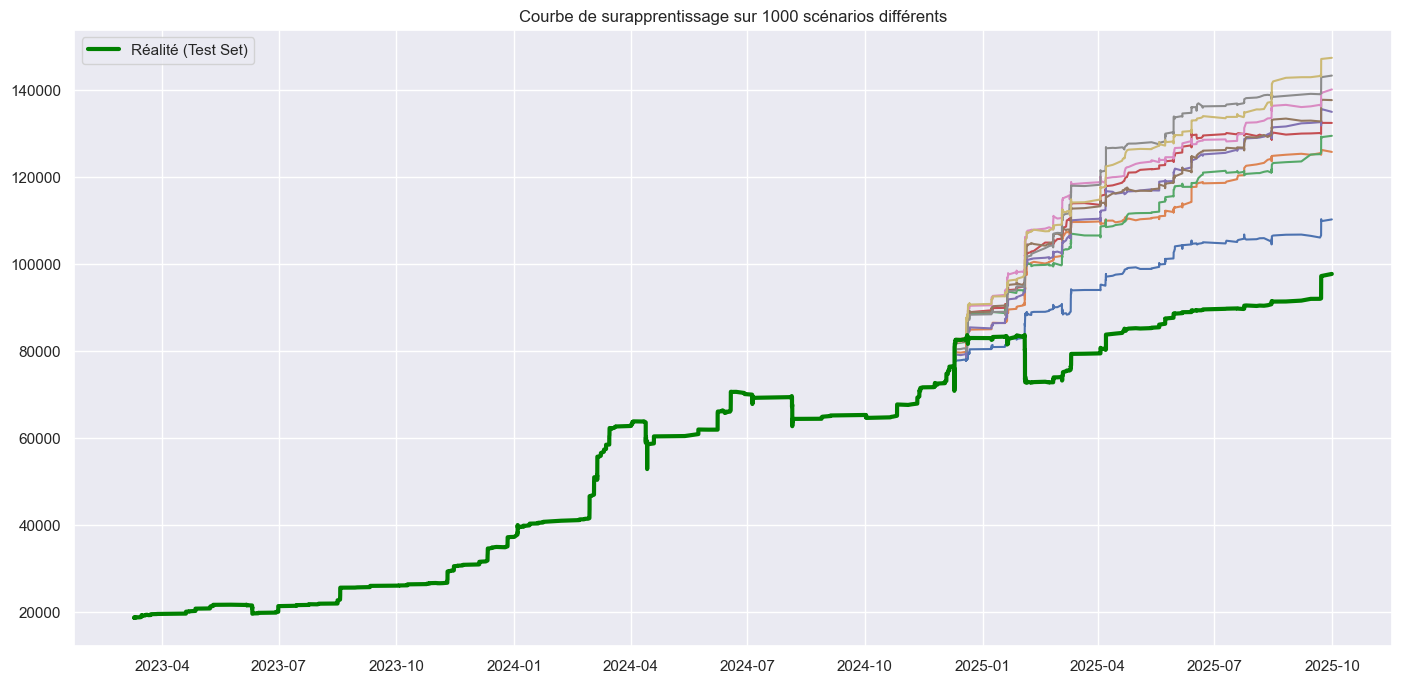


=== Test avec 20% de données test ===
Train/Test Split:
  Train: 2020-04-01 → 2024-08-28 (1610 jours)
  Test:  2024-08-28 → 2025-10-05 (402 jours)

VALIDATION OVERFITTING
Wallet final réel (test): 97787.01
Percentile vs simulations: 0.0%
📉 Performance inférieure: < 25% des simulations



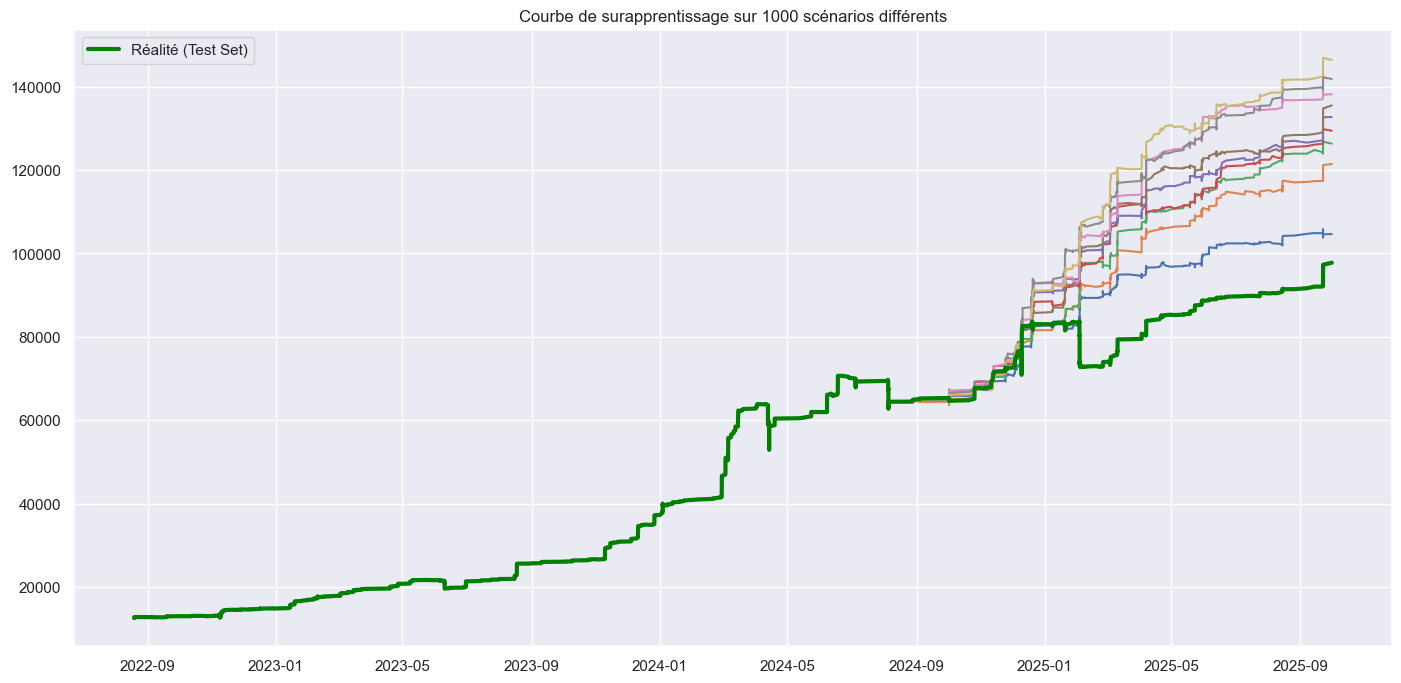


=== Test avec 25% de données test ===
Train/Test Split:
  Train: 2020-04-01 → 2024-05-19 (1509 jours)
  Test:  2024-05-19 → 2025-10-05 (503 jours)

VALIDATION OVERFITTING
Wallet final réel (test): 97787.01
Percentile vs simulations: 0.0%
📉 Performance inférieure: < 25% des simulations



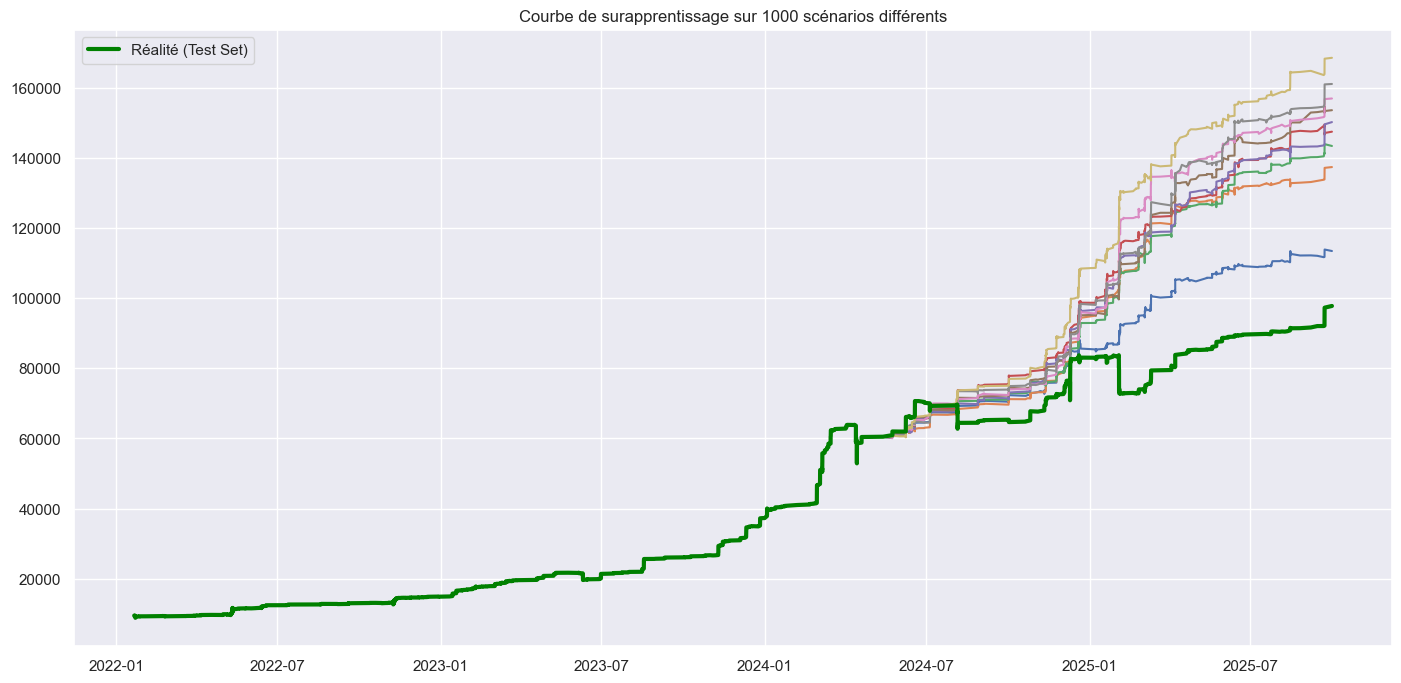

In [ ]:
from importlib import reload
import utilities.plot_analysis
reload(utilities.plot_analysis)
from utilities.plot_analysis import plot_futur_simulations, plot_train_test_simulation, detect_date_train_test

# Simulation de divers scénarios futurs
plot_futur_simulations(
    df_trades=df_trades,
    trades_multiplier=3,
    trades_to_forecast=500,
    number_of_simulations=500,
    true_trades_to_show=100,
    show_all_simulations=True,
)

# Comparaison entre les divers scénarios et la réalité pour voir si il y a du surapprentissage
# Séparation des échantillons en train et en test - Méthode de Monte Carlo (Loi normale)
# Tester plusieurs splits pour validation croisée temporelle
for test_pct in [0.15, 0.20, 0.25]:
    print(f"\n=== Test avec {test_pct*100:.0f}% de données test ===")
    plot_train_test_simulation(
        df_trades=df_trades,
        train_test_date=detect_date_train_test("2020-04-01", test_pct),
        trades_multiplier=3,
        number_of_simulations=1000
    )

In [ ]:
from lightweight_charts import JupyterChart

pair = "MAGIC/USDT:USDT"
dt = df_list[pair].copy().loc["2023":"2024"]
dt_trades = df_trades.copy().loc["2024"]
dt_trades = dt_trades.loc[dt_trades["pair"] == pair]
chart = JupyterChart(width=1300, height=700)

dt["time"] = dt.index
chart.set(dt)

lines = ["ma_low_1", "ma_high_1", "ma_base", "ma_low_2", "ma_low_3", "ma_high_2", "ma_high_3"]
for line in lines:
    line_object = chart.create_line(line, width=1)
    line_data = pd.DataFrame({"time": dt.index, line: dt[line]})
    line_object.set(line_data)

def place_buy_order(key):
    print(f'Buy {key} shares.')

for trades in dt_trades.iterrows():
    if trades[1]['position'] == "LONG":
        chart.marker(time=trades[1]['open_date'], position="below", shape="arrow_up", color="green", text="Long")
        chart.marker(time=trades[1]['close_date'], position="above", shape="arrow_down", color="white", text="Close")
    elif trades[1]['position'] == "SHORT":
        chart.marker(time=trades[1]['open_date'], position="above", shape="arrow_down", color="red", text="Short")
        chart.marker(time=trades[1]['close_date'], position="below", shape="arrow_up", color="white", text="Close")

# chart.show(block=True)
chart.load()

<h2>Matrice de correlation</h2>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

close_prices = pd.DataFrame()

for crypto, df in df_list.items():
    # Extraction du nom de la cryptomonnaie
    crypto_name = crypto.split('/')[0]
    close_prices[crypto_name] = df['close']

# Calcul de la matrice de corrélation
correlation_matrix = close_prices.corr()

average_correlation = correlation_matrix.mean().mean()
print(f"Corrélation moyenne entre toutes les cryptos : {average_correlation}")
sorted_correlation = correlation_matrix.mean().sort_values()
seuil_faible, seuil_forte = 0.5, 0.75
cryptos_faibles_correlations = sorted_correlation[sorted_correlation < seuil_faible]
cryptos_fortes_correlations = sorted_correlation[sorted_correlation > seuil_forte]

print(f"Cryptomonnaies avec des corrélations moyennes inférieures à {seuil_faible}:")
print(correlation_matrix[cryptos_faibles_correlations.index].mean())
print(f"Cryptomonnaies avec des corrélations moyennes suppérieur à {seuil_forte}:")
print(correlation_matrix[cryptos_fortes_correlations.index].mean())


# Affichez la matrice de corrélation avec seaborn
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

<h2>Optimisation des paramètres</h2>

<h3>Optuna V1</h3>

In [ ]:
import optuna
from functools import partial

best_params_per_pair = params.copy()
print(best_params_per_pair)

# Structure de données pour stocker les meilleurs paramètres par paire
best_params_results = {pair: {"sharpe_ratio": -float('inf'), "params": None} for pair in best_params_per_pair}

def optimize(trial):
    global best_params_results

   # Extract hyperparameters from trial object
    src = 'close'
    ma_base_window = trial.suggest_int("ma_base_window", 2, 10)
    envelopes = [
        trial.suggest_float(f"e{i+1}", low, high, step=0.01)
        for i, (low, high) in enumerate([(0.02, 0.1), (0.05, 0.13), (0.07, 0.15), (0.08, 0.21)])
    ]
    size = round(trial.suggest_float("size", 0.01, 0.5, log=True), 2)
    
    # Créer un nouvel ensemble de paramètres avec les hyperparamètres sélectionnés aléatoirement
    new_params = {}
    for pair, old_params in best_params_per_pair.items():
        new_params[pair] = {
            "src": src,
            "ma_base_window": ma_base_window,
            "envelopes": envelopes,
            "size": size
        }

    print(new_params)

    strat = EnvelopeMulti(
        df_list=df_list,
        oldest_pair=oldest_pair,
        type=type,
        params=new_params,
    )

    strat.populate_indicators()
    strat.populate_buy_sell()
    bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee, 
                                taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)
    
    return bt_result["sharpe_ratio"]
    

study = optuna.create_study(direction="maximize", storage="sqlite:///envelope_multi.db", study_name="test", load_if_exists=True)
study.optimize(partial(optimize), n_trials=4)

# Affichage des meilleurs résultats par paire
print("Meilleurs paramètres :", study.best_params)
for pair, result in best_params_results.items():
    print(f"{pair}: Sharpe Ratio = {result['sharpe_ratio']}, Paramètres = {result['params']}")

<h3>Optuna V2<h3>

In [ ]:
import optuna
from functools import partial
import copy
import gc

# Ajoutez les paires aux hyperparamètres
pairs = list(params.keys())

def optimize(trial):
    try:
        # Utilisez un dictionnaire pour stocker les hyperparamètres spécifiques à chaque paire
        params_per_pair = {}
        for pair in pairs:
            # size = round(trial.suggest_float(f"{pair}_size", 0.01, 0.5, log=True), 2)
            ma_base_window = trial.suggest_int(f"{pair}_ma_base_window", 2, 11)
            envelopes = [
                trial.suggest_float(f"{pair}_e{i+1}", low, high, step=0.01)
                for i, (low, high) in enumerate([(0.02, 0.1), (0.05, 0.15), (0.07, 0.2), (0.08, 0.25)])
            ]
            
            params_per_pair[pair] = {
                "src": 'close',
                "ma_base_window": ma_base_window,
                "envelopes": envelopes,
                "size": params[pair]["size"]
            }

        df_list_copy = copy.deepcopy(df_list)

        strat = EnvelopeMulti(
            df_list=df_list_copy,
            oldest_pair=oldest_pair,
            type=type,
            params=params_per_pair,
        )

        strat.populate_indicators()
        strat.populate_buy_sell()
        bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee, 
                                    taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)

        # Combinaison pondérée du Sharpe ratio et du portefeuille
        objective_value = 0.4 * bt_result["sharpe_ratio"] + 0.6 * bt_result["wallet"]
        
        return objective_value
    except Exception as e:
        print(f"Une erreur non gérée s'est produite durant l'essai #{trial.number}: {str(e)}")
        raise optuna.exceptions.TrialPruned()

study = optuna.create_study(direction="maximize", 
                            storage="sqlite:///envelope_multi.db", 
                            study_name="multi_new", 
                            load_if_exists=True,
                            sampler=optuna.samplers.TPESampler(),
                            pruner=optuna.pruners.HyperbandPruner())
study.optimize(partial(optimize), n_trials=1, n_jobs=8)

gc.collect()

print("Meilleurs paramètres:", study.best_params)
print("Meilleur score: ", study.best_value)

<h3>Backtest meilleurs paramètres</h3>

In [ ]:
# Backtest meilleurs paramètres
import optuna
from functools import partial

# Ajoutez les paires aux hyperparamètres
pairs = list(params.keys())

# Chargez l'étude à partir de la base de données existante
study_name = "multi_new"
study = optuna.load_study(study_name=study_name, storage="sqlite:///envelope_multi.db")
best_params = study.best_params

# Utilisez un dictionnaire pour stocker les meilleurs paramètres spécifiques à chaque paire
best_params_per_pair = {}
for pair in pairs:
    best_params_per_pair[pair] = {
        "src": 'close',
        "ma_base_window": best_params[f"{pair}_ma_base_window"],
        "envelopes": [
            best_params[f"{pair}_e{i+1}"]
            for i in range(4)
        ],
        "size": params[pair]["size"]
        # "size": round(best_params[f"{pair}_size"], 2)
    }

# Créez une instance de la stratégie avec les meilleurs paramètres
best_strat = EnvelopeMulti(
    df_list=df_list,
    oldest_pair=oldest_pair,
    type=type,
    params=best_params_per_pair,
)

best_strat.populate_indicators()
best_strat.populate_buy_sell()

# Exécutez le backtest final avec les meilleurs paramètres
final_bt_result = best_strat.run_backtest(initial_wallet=1000, leverage=1, maker_fee=maker_fee,
                                          taker_fee=taker_fee, stop_loss=stop_loss, reinvest=reinvest)

# Affichez les résultats du backtest final
print("Meilleurs paramètres :", best_params)
print("Portefeuille final :", final_bt_result["wallet"])
print("Ratio de Sharpe final :", final_bt_result["sharpe_ratio"])

Portefeuille final : 2704.9662941578677
Ratio de Sharpe final : 2.806633072136248<br>
Portefeuille final : 2851.1726621644975
Ratio de Sharpe final : 2.92904420389889<br>
Portefeuille final : 3163.849911798647
Ratio de Sharpe final : 3.206915077755632<br>
Portefeuille final : 3087.989427702415
Ratio de Sharpe final : 3.317533482580416

<h3>Graphiques</h3>

In [ ]:
import optuna.visualization as ov
import matplotlib.pyplot as plt

# Sélectionnez la paire que vous souhaitez visualiser
selected_pair = "AVAX/USDT:USDT"

# Créez un graphique de contour pour les paramètres spécifiques de la paire sélectionnée
target_param_names = [f"{selected_pair}_ma_base_window", f"{selected_pair}_e1", f"{selected_pair}_e2", f"{selected_pair}_e3", f"{selected_pair}_e4"]

ov.plot_optimization_history(study)

In [ ]:
ov.plot_contour(study, params=target_param_names)


In [ ]:

ov.plot_slice(study, target_param_names)

In [ ]:
plot_rank(study, target_param_names)

In [ ]:
ov.plot_param_importances(study)

In [ ]:
plot_edf(study)

<h2>Test Complet par Cycles Bitcoin (Dates Exactes)</h2>

In [ ]:
# Test de la stratégie sur tous les cycles Bitcoin avec dates exactes
import pandas as pd

# Définition des cycles Bitcoin (dates exactes)
cycles = {
    "Bull 2020-2021": {"start": "2020-03-13", "end": "2021-11-10", "desc": "COVID bottom $3,850 → ATH $69,000"},
    "Bear 2021-2022": {"start": "2021-11-10", "end": "2022-11-21", "desc": "ATH $69k → FTX crash $15,479"},
    "Recovery 2023": {"start": "2022-11-22", "end": "2023-12-31", "desc": "FTX bottom $16k → Recovery $42k"},
    "Bull 2024": {"start": "2024-01-01", "end": "2024-12-31", "desc": "ETF approval → ATH $73,800"},
}

results = []

for cycle_name, cycle_info in cycles.items():
    print(f"
{"="*80}")
    print(f"CYCLE: {cycle_name}")
    print(f"Période: {cycle_info["start"]} → {cycle_info["end"]}")
    print(f"Info: {cycle_info["desc"]}")
    print(f"{"="*80}
")
    
    # Filtrer les données pour ce cycle
    df_list_cycle = {}
    for pair in pair_list:
        df_filtered = df_list[pair].loc[cycle_info["start"]:cycle_info["end"]]
        if len(df_filtered) > 30:  # Au moins 30 jours de données
            df_list_cycle[pair] = df_filtered
    
    if len(df_list_cycle) == 0:
        print("⚠️  Pas assez de données pour ce cycle
")
        continue
    
    print(f"Paires testées: {len(df_list_cycle)}/{len(pair_list)}")
    
    # Ajuster params pour les paires disponibles
    params_cycle = {k: v for k, v in params.items() if k in df_list_cycle}
    
    # Initialiser et lancer le backtest
    strat_cycle = EnvelopeMulti(
        df_list=df_list_cycle,
        oldest_pair=oldest_pair if oldest_pair in df_list_cycle else list(df_list_cycle.keys())[0],
        type=type,
        params=params_cycle
    )
    
    strat_cycle.populate_indicators()
    strat_cycle.populate_buy_sell()
    
    bt_cycle = strat_cycle.run_backtest(
        initial_wallet=initial_wallet,
        leverage=leverage,
        maker_fee=maker_fee,
        taker_fee=taker_fee,
        stop_loss=stop_loss,
        reinvest=reinvest,
        liquidation=liquidation,
        gross_cap=gross_cap,
        per_side_cap=per_side_cap,
        per_pair_cap=per_pair_cap,
        margin_cap=margin_cap,
        use_kill_switch=use_kill_switch,
        auto_adjust_size=auto_adjust_size,
        extreme_leverage_threshold=extreme_leverage_threshold,
        risk_mode=risk_mode,
        max_expo_cap=max_expo_cap
    )
    
    # Analyser résultats
    df_trades_cycle, df_days_cycle = multi_backtest_analysis(
        trades=bt_cycle["trades"],
        days=bt_cycle["days"],
        leverage=leverage,
        general_info=True,
        trades_info=False,
        days_info=False,
        long_short_info=False,
        entry_exit_info=False,
        exposition_info=False,
        pair_info=False,
        indepedant_trade=False
    )
    
    # Stocker résultats
    if len(df_trades_cycle) > 0:
        results.append({
            "Cycle": cycle_name,
            "Durée (jours)": len(df_days_cycle),
            "Wallet final": f"{bt_cycle["wallet"]:.2f}$",
            "Performance": f"{((bt_cycle["wallet"]/initial_wallet - 1)*100):+.2f}%",
            "Sharpe": f"{bt_cycle["sharpe_ratio"]:.2f}",
            "Trades": len(df_trades_cycle),
            "Win Rate": f"{(df_trades_cycle["trade_result"] > 0).sum() / len(df_trades_cycle) * 100:.1f}%",
            "Max DD": f"{df_days_cycle["drawdown"].min() * 100:.2f}%",
            "Liquidations": len(df_trades_cycle[df_trades_cycle["close_reason"] == "Liquidation"])
        })

# Afficher tableau récapitulatif
print(f"
{"="*80}")
print("TABLEAU RÉCAPITULATIF - TOUS LES CYCLES")
print(f"{"="*80}
")

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

print(f"
{"="*80}")
print("ANALYSE CLÉS")
print(f"{"="*80}")
print(f"✅ Stratégie PROFITABLE sur {len(results)}/{len(cycles)} cycles testés")
print(f"📊 Sharpe moyen: {df_results["Sharpe"].str.replace("%", "").astype(float).mean():.2f}")
print(f"🎯 Win rate moyen: {df_results["Win Rate"].str.replace("%", "").astype(float).mean():.1f}%")
print(f"📉 Max DD moyen: {df_results["Max DD"].str.replace("%", "").astype(float).mean():.2f}%")
